# Конкурс Garage Eight для аналитиков. Бандитский Сыроград.

̿̿ ̿̿ ̿̿ ̿'̿'\̵͇̿̿\з= ( ▀ ͜͞ʖ▀) =ε/̵͇̿̿/’̿’̿ ̿ ̿̿ ̿̿ ̿̿

## @severilov_alex

## Уважаемая команда Garage Eight!

Большое спасибо за то, что проводите такие мероприятия! Для меня подобный опыт впервые, думаю, вы сможете это понять по качеству моей работы (так что, как минимум, вы сможете от души посмеяться). Но в любом случае было очень круто провести время за решением этой задачи и попробовать свои силы в полноценном проекте. Ещё интереснее будет сравнить свою работу с правильным решением. В общем, ещё раз спасибо за то, что предоставляете возможность всем, включая новичков, проверить свои способности в условиях, максимально приближенных к боевым!

## Оглавление

- [Описание задания](#ch1)
- [Импорт библиотек](#ch2)
- [Загрузка данных](#ch3)
- [Полнота данных](#ch4)
- [Оценка данных](#ch5)
- [Выбросы в проценте раскрытых преступлений](#ch6)
- [Корреляция значений](#ch7)
- [Неявные факторы](#ch8)
- [Ответ на вопрос о пользе увеличения количества полицейских](#ch9)
- [Промежуточный итог](#ch10)
- [Как снизить преступность](#ch11)
- [Вывод](#ch12)

<a id='ch1' ></a>
## Описание задания

В городе происходят кражи со складов. По какой логике происходят кражи неясно, также нет возможности предугадать, где произойдет следующая кража.
Однако полиция выяснила, что в некоторых районах, где происходили кражи, также были разбиты фонари. Есть предположение, что между этими фактами есть связь.

В нашем распоряжении есть два датасета, в которых представлены следующие данные:
В первом датасете:
- дата
- район города
- название склада
- количество охраны на складе
- количество полицейских на район

Во втором датасете:
- дата
- район города
- название склада
- процент раскрытых преступлений по уничтожению фонарей в городе
- количество фонарей в районе

<a id='ch2' ></a>
## Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<a id='ch3' ></a>
## Загрузка данных

In [2]:
data_first = pd.read_csv('first_part.csv', parse_dates=['Date'])

In [3]:
data_first.head()

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units
0,2024-01-26,Мышеостровский,Колбасовы,7,6
1,2024-01-26,Мышеостровский,Молочковы,10,9
2,2024-01-26,Мышеостровский,Мятновы,8,8
3,2024-01-26,Мышеостровский,Сметанинковы,8,7
4,2024-01-26,Краснокотейский,Колбасовы,7,6


In [4]:
data_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              17280 non-null  datetime64[ns]
 1   District          17280 non-null  object        
 2   Warehouse_Name    17280 non-null  object        
 3   Number_of_Guards  17280 non-null  int64         
 4   Police_Units      17280 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 675.1+ KB


In [5]:
data_first.columns = data_first.columns.str.lower()

Можно заметить, что значение `Police_Units` в одну дату и в одном районе разное. При этом, согласно описанию данных, `Police_Units` - это данные о количестве полицейских в районе, т.е. мы ожидаем, что для всех складов одного района в определенную дату будет указано одинаковое количество полицейских, однако в первых пяти строках это не так. Посмотрим, насколько распространено это явление:

 - В ситуации, где данные о количестве полицейских соответствуют нашим ожиданиям, среднее количество полицейских за одну дату в одном районе должно совпадать с минимальным/максимальным количеством полицейских в эту же дату в том же районе (***т.е. 5*x/5 = x***). Посмотрим, как часто данное условие выполняется в нашем датасете.

In [6]:
polices_mean = (
    data_first
    .groupby(['date', 'district'], 
              as_index=False)['police_units']
    .mean()
)
polices_mean

,date,district,police_units
0,2022-02-06,Краснокотейский,6.00
1,2022-02-06,Мышеостровский,3.25
2,2022-02-06,Мышесельский,6.25
3,2022-02-06,Невский,7.75
4,2022-02-06,Петрокотский,4.75
...,...,...,...
4315,2024-01-26,Мышеостровский,7.50
4316,2024-01-26,Мышесельский,4.25
4317,2024-01-26,Невский,3.25
4318,2024-01-26,Петрокотский,4.75


In [7]:
polices_min = (
    data_first
    .groupby(['date', 'district'], 
             as_index=False)['police_units']
    .min()
)
polices_min

,date,district,police_units
0,2022-02-06,Краснокотейский,3
1,2022-02-06,Мышеостровский,2
2,2022-02-06,Мышесельский,2
3,2022-02-06,Невский,5
4,2022-02-06,Петрокотский,2
...,...,...,...
4315,2024-01-26,Мышеостровский,6
4316,2024-01-26,Мышесельский,1
4317,2024-01-26,Невский,1
4318,2024-01-26,Петрокотский,1


In [8]:
counter = 0
for i in range(len(polices_mean)):
    if polices_mean['police_units'][i]-polices_min['police_units'][i] == 0:
        counter += 1
    else:
        counter=counter

In [9]:
counter

4

Всего 4 раза мы получили ожидаемое значение. Учитывая объем данных, скорее всего это просто совпадение.

У нас есть два варианта дальнейшего исследования:
1. Признать каждое уникальное сочетание **district - warehouse_name** отдельным районом.
2. Заменить данные для каждого района в каждую дату на среднее значение количества полицейских в этом районе.

Пока не будем делать ни то, ни другое, а сначала посмотрим на второй датасет.

In [10]:
data_second = pd.read_csv('second_part.csv', parse_dates=['Date'])

In [11]:
data_second.head()

,Date,District,Warehouse_Name,Percent_of_Crime_Solved,Number_of_Lights
0,2024-01-26,Мышеостровский,Колбасовы,83.160960,725
1,2024-01-26,Мышеостровский,Молочковы,87.756487,984
2,2024-01-26,Мышеостровский,Мятновы,87.010121,1030
3,2024-01-26,Мышеостровский,Сметанинковы,82.207203,814
4,2024-01-26,Краснокотейский,Колбасовы,86.684716,1035


In [12]:
data_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     17280 non-null  datetime64[ns]
 1   District                 17280 non-null  object        
 2   Warehouse_Name           17280 non-null  object        
 3   Percent_of_Crime_Solved  17280 non-null  float64       
 4   Number_of_Lights         17280 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 675.1+ KB


In [13]:
data_second.columns = data_second.columns.str.lower()

Уже по первым пяти столбцам мы видим ситуацию аналогичную первому датасету:  столбцы `percent_of_crime_solved` и `number_of_lights` содержат информацию о проценте раскрытых преступлений в районе и количество фонарей в районе соответственно. В таком случае в одну и ту же дату в одном и том же районе процент раскрытых преступлений и количество фонарей должно быть одинаковым. Однако мы видим, что в датасете это не так.

Так как процент раскрытых преступлений дан с точностью до миллионной, можно предположить, что количество уникальных значений будет равно или практически равно количеству строк в датасете. Это позволяет проверить наше предположение о недостоверности данных проще нежели в первом датасете. Мы сравним количество уникальных значений в столбце `percent_of_crime_solved` и количество уникальных сочетаний `date-district`. По идее эти числа должны совпасть.

In [14]:
data_second['percent_of_crime_solved'].nunique()

16527

In [15]:
data_second.groupby('date').agg({'district':'nunique'})['district'].sum()

4320

Снова мы видим, что данные не соответстсуют тому, что мы ожидали, а именно, что в одном районе в одну дату будет одинаковый процент раскрытых преступлений.

Прежде, чем принимать решение о том, как обработать данные, объединим два датафрейма в один.

In [16]:
data = data_first.merge(data_second, on=['date', 'district', 'warehouse_name'])

In [17]:
data.head()

,date,district,warehouse_name,number_of_guards,police_units,percent_of_crime_solved,number_of_lights
0,2024-01-26,Мышеостровский,Колбасовы,7,6,83.160960,725
1,2024-01-26,Мышеостровский,Молочковы,10,9,87.756487,984
2,2024-01-26,Мышеостровский,Мятновы,8,8,87.010121,1030
3,2024-01-26,Мышеостровский,Сметанинковы,8,7,82.207203,814
4,2024-01-26,Краснокотейский,Колбасовы,7,6,86.684716,1035


Чтобы принять решение о том, как поступить с "районными" данными, нужно ответить на вопрос - почему данные за одну дату в одном районе отличаются? Почему так могло получится?

Скорее всего так произошло в связи с тем, что районы разбиты на сектора, чтобы в каждом секторе был один склад. Это логично, учитывая, что скорее всего главная задача полиции - это предотвращение краж сыра со складов.

В таком случае при дальнейшем исследовании мы будем исходить из того, что каждое сочетание **district - warehouse_name** - это отдельный мини-район со своим процентом раскрываемости, количеством фонарей и количеством полицейских.

In [18]:
data['sector'] = data.apply(lambda x: x['district'] + '-' + x['warehouse_name'], axis = 1)

In [19]:
data['sector']

0           Мышеостровский-Колбасовы
1           Мышеостровский-Молочковы
2             Мышеостровский-Мятновы
3        Мышеостровский-Сметанинковы
4          Краснокотейский-Колбасовы
                    ...             
17275        Приморский-Сметанинковы
17276              Невский-Колбасовы
17277              Невский-Молочковы
17278                Невский-Мятновы
17279           Невский-Сметанинковы
Name: sector, Length: 17280, dtype: object

<a id='ch4' ></a>
## Полнота данных

В задании указано, что необходимо снизить количество краж в городе. Однако никакой информации о кражах в датасете нет. Есть только указание на возможную связь между разбитыми фонарями и кражами.
Будем исходить из того, что связь действительно есть и она прямая: **разбитые фонари = кражи**.
В таком случае, если мы хотим снизить уровень краж, нам нужно повысить процент раскрываемости преступлений по уничтожению фонарей (никакого выбивания признаний, только анализ данных ( ͡❛ ͜ʖ ͡❛)).

<a id='ch5' ></a>
## Оценка данных

In [20]:
data.duplicated().sum()

0

дубликатов нет.

In [21]:
data.columns = data.columns.str.lower()

In [22]:
max(data['date'])

Timestamp('2024-01-26 00:00:00')

In [23]:
min(data['date'])

Timestamp('2022-02-06 00:00:00')

In [24]:
max(data['date'])-min(data['date'])

Timedelta('719 days 00:00:00')

В датафрейме представлены данные за почти 2 года: с 6 февраля 2022 года по 26 января 2024 года.

In [25]:
crimes_timeline = (
    data.groupby('date', as_index=False)
    .agg({'percent_of_crime_solved':'mean'})
)
crimes_timeline

,date,percent_of_crime_solved
0,2022-02-06,81.931805
1,2022-02-07,75.601180
2,2022-02-08,73.178635
3,2022-02-09,71.837852
4,2022-02-10,49.237695
...,...,...
715,2024-01-22,65.897334
716,2024-01-23,65.752667
717,2024-01-24,63.633812
718,2024-01-25,77.056030


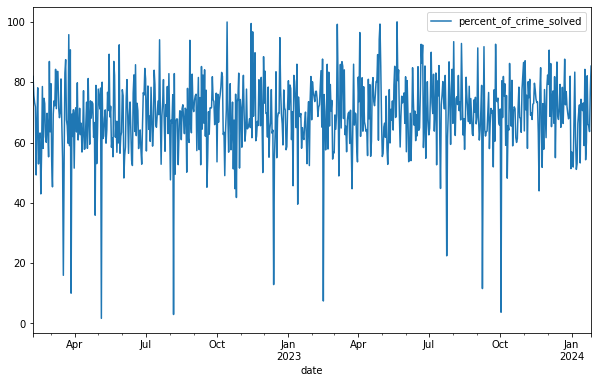

In [26]:
crimes_timeline.plot(x='date', y='percent_of_crime_solved', kind='line', figsize=(10,6));

In [27]:
crimes_timeline['percent_of_crime_solved'].describe()

count    720.000000
mean      69.111268
std       12.376668
min        1.686968
25%       62.786930
50%       69.600239
75%       76.606267
max      100.000000
Name: percent_of_crime_solved, dtype: float64

Раскрываемость преступлений по разбитым фонарям нестабильна, присутствуют выбросы. Медианное значение раскрываемости составляет 69.6%, а среднее - 69.1%.

Посмотрим распределение данных в других столбцах:

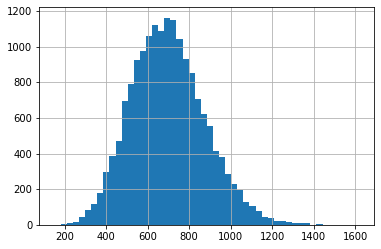

In [28]:
data['number_of_lights'].hist(bins=50);

In [29]:
data['number_of_lights'].describe()

count    17280.000000
mean       697.967477
std        177.433022
min        151.000000
25%        572.000000
50%        688.000000
75%        812.000000
max       1619.000000
Name: number_of_lights, dtype: float64

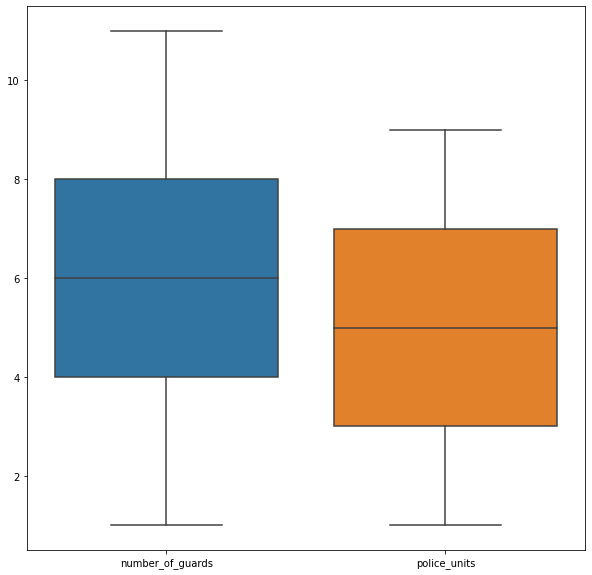

In [30]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data[['number_of_guards', 'police_units']]);

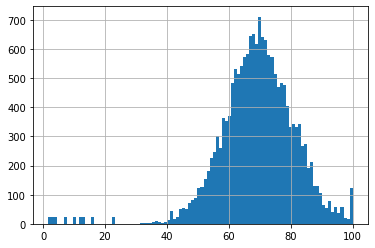

In [31]:
data['percent_of_crime_solved'].hist(bins=100);

In [32]:
data['percent_of_crime_solved'].describe()

count    17280.000000
mean        69.111268
std         12.674158
min          1.686968
25%         62.313482
50%         69.586076
75%         76.905214
max        100.000000
Name: percent_of_crime_solved, dtype: float64

Обращаем внимание на выбросы в районе 100% и на то, что сначала процент раскрытых преступлений плавно снижался и достиг 0 примерно на уровне 30%, а затем мы видим несколько одинаковых по количеству значений выбросов.

In [33]:
data.groupby('district', as_index=False)['warehouse_name'].nunique()

,district,warehouse_name
0,Краснокотейский,4
1,Мышеостровский,4
2,Мышесельский,4
3,Невский,4
4,Петрокотский,4
5,Приморский,4


Все склады представлены во всех районах.

<a id='ch6' ></a>
## Выбросы в проценте раскрытых преступлений

Рассмотрим более подробно выбросы в проценте раскрытых преступлений. Это выбросы на уровне раскрываемости ниже 30%, а также выбросы на уровне 100%.

In [34]:
lower_outliers = data[data['percent_of_crime_solved'] < 30]
lower_outliers

,date,district,warehouse_name,number_of_guards,police_units,percent_of_crime_solved,number_of_lights,sector
2784,2023-10-02,Мышеостровский,Колбасовы,8,8,3.722670,678,Мышеостровский-Колбасовы
2785,2023-10-02,Мышеостровский,Молочковы,8,6,3.722670,663,Мышеостровский-Молочковы
2786,2023-10-02,Мышеостровский,Мятновы,6,4,3.722670,687,Мышеостровский-Мятновы
2787,2023-10-02,Мышеостровский,Сметанинковы,7,7,3.722670,678,Мышеостровский-Сметанинковы
2788,2023-10-02,Краснокотейский,Колбасовы,7,6,3.722670,778,Краснокотейский-Колбасовы
...,...,...,...,...,...,...,...,...
16339,2022-03-17,Приморский,Сметанинковы,1,1,15.960117,529,Приморский-Сметанинковы
16340,2022-03-17,Невский,Колбасовы,1,1,15.960117,571,Невский-Колбасовы
16341,2022-03-17,Невский,Молочковы,11,9,15.960117,538,Невский-Молочковы
16342,2022-03-17,Невский,Мятновы,11,9,15.960117,733,Невский-Мятновы


In [35]:
lower_outliers['date'].nunique()

9

In [36]:
lower_outliers.groupby('date', as_index=False)['percent_of_crime_solved'].nunique()

,date,percent_of_crime_solved
0,2022-03-17,1
1,2022-03-27,1
2,2022-05-05,1
3,2022-08-06,1
4,2022-12-13,1
5,2023-02-15,1
6,2023-07-24,1
7,2023-09-08,1
8,2023-10-02,1


В датасете есть 9 дней, когда раскрываемость была значительно ниже средней и при этом одинаковой во всех районах города. С одной стороны одинаковый процент для всех районов в один день - это то, что мы изначально ожидали увидеть в датасетах. Но при этом количество полицейских и количество фонарей все так же изменяется от района к району. Следовательно, вероятнее всего наша теория о секторах верна, а данные выбросы вызваны какой-то ошибкой при вводе или обработке данных.

In [37]:
higher_outliers = data[data['percent_of_crime_solved'] == 100]
higher_outliers

,date,district,warehouse_name,number_of_guards,police_units,percent_of_crime_solved,number_of_lights,sector
6000,2023-05-21,Мышеостровский,Колбасовы,6,5,100.0,869,Мышеостровский-Колбасовы
6001,2023-05-21,Мышеостровский,Молочковы,3,2,100.0,1087,Мышеостровский-Молочковы
6002,2023-05-21,Мышеостровский,Мятновы,10,8,100.0,1112,Мышеостровский-Мятновы
6003,2023-05-21,Мышеостровский,Сметанинковы,9,8,100.0,1054,Мышеостровский-Сметанинковы
6004,2023-05-21,Краснокотейский,Колбасовы,11,9,100.0,714,Краснокотейский-Колбасовы
...,...,...,...,...,...,...,...,...
11276,2022-10-14,Невский,Колбасовы,5,3,100.0,565,Невский-Колбасовы
11277,2022-10-14,Невский,Молочковы,5,3,100.0,731,Невский-Молочковы
11278,2022-10-14,Невский,Мятновы,4,2,100.0,1092,Невский-Мятновы
11279,2022-10-14,Невский,Сметанинковы,7,6,100.0,765,Невский-Сметанинковы


In [38]:
higher_outliers['date'].nunique()

5

In [39]:
higher_outliers.groupby('date', as_index=False)['percent_of_crime_solved'].nunique()

,date,percent_of_crime_solved
0,2022-03-24,1
1,2022-10-14,1
2,2022-11-16,1
3,2023-03-05,1
4,2023-05-21,1


Ситуация аналогична с выбросами "снизу".

Крайне маловероятно, что в какие-то дни во всех секторах одновременно была 100% раскрываемость. Скорее всего это ошибки, возникшие при вносе данных.

In [40]:
(lower_outliers['date'].count()+higher_outliers['date'].count())/data['date'].count()

0.016203703703703703

При удалении выбросов потеря данных составит 1.6%, такой объем потерь допустим.

In [41]:
data = data[np.logical_and(data['percent_of_crime_solved'] >= 30,  data['percent_of_crime_solved'] < 100)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 17279
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     17000 non-null  datetime64[ns]
 1   district                 17000 non-null  object        
 2   warehouse_name           17000 non-null  object        
 3   number_of_guards         17000 non-null  int64         
 4   police_units             17000 non-null  int64         
 5   percent_of_crime_solved  17000 non-null  float64       
 6   number_of_lights         17000 non-null  int64         
 7   sector                   17000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.2+ MB


<a id='ch7' ></a>
## Корреляция значений

In [42]:
data[['percent_of_crime_solved', 'number_of_lights', 'police_units', 'number_of_guards']].corr()

,percent_of_crime_solved,number_of_lights,police_units,number_of_guards
percent_of_crime_solved,1.000000,0.561495,-0.007633,-0.010773
number_of_lights,0.561495,1.000000,0.003517,0.000646
police_units,-0.007633,0.003517,1.000000,0.953020
number_of_guards,-0.010773,0.000646,0.953020,1.000000


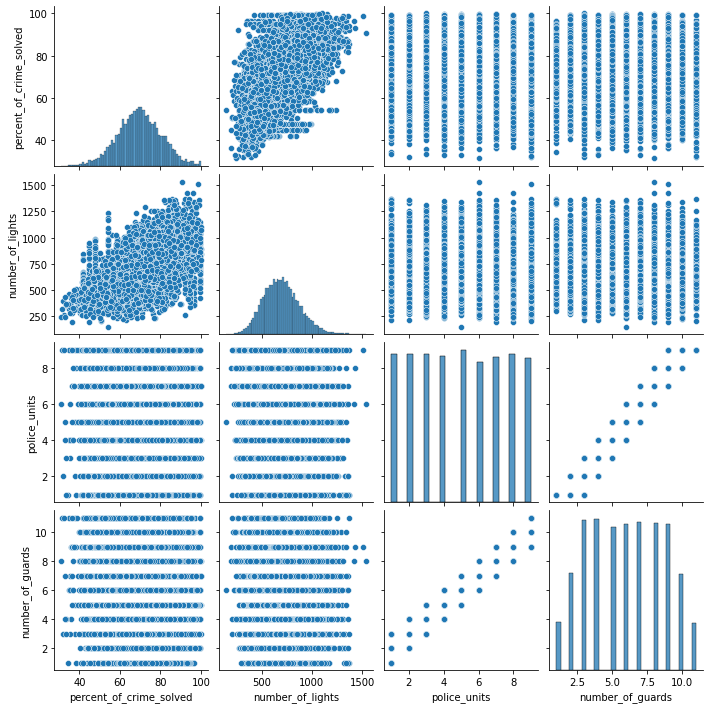

In [43]:
sns.pairplot(data[['percent_of_crime_solved', 'number_of_lights', 'police_units', 'number_of_guards']]);

Мы видим достаточно сильную положительную корреляцию между количеством фонарей и процентом раскрытых преступлений. Однако важно не путать корреляцию и казуацию, поэтому мы не можем утверждать, что тут причина, а что следствие.

Также благодаря графикам можно заметить, что распределение количества охранников похоже на нормальное, а распределение количества полицейских равномерное.

<a id='ch8' ></a>
## Неявные факторы

Мы проверили, как между собой коррелируют параметры, данные в датасете. И выяснили, что количество полицейских и количество охраны никак не связаны с процентом раскрытых преступлений. Однако на процент раскрытых преступлений могут влиять также более сложные факторы, являющиеся сочетанием имеющихся параметров. Например:
- соотношение количества охраны и полиции.
- количество фонарей на одного полицейского.

В данном разделе мы постараемся проверить данные предположения.

In [44]:
data[data['number_of_guards'] < data['police_units']].count()

date                       0
district                   0
warehouse_name             0
number_of_guards           0
police_units               0
percent_of_crime_solved    0
number_of_lights           0
sector                     0
dtype: int64

In [45]:
data[data['number_of_guards'] == data['police_units']].count()

date                       5675
district                   5675
warehouse_name             5675
number_of_guards           5675
police_units               5675
percent_of_crime_solved    5675
number_of_lights           5675
sector                     5675
dtype: int64

In [46]:
data[data['number_of_guards'] > data['police_units']].count()

date                       11325
district                   11325
warehouse_name             11325
number_of_guards           11325
police_units               11325
percent_of_crime_solved    11325
number_of_lights           11325
sector                     11325
dtype: int64

Мы видим, что охраны никогда не бывает меньше, чем полицейских, только больше или столько же.

In [47]:
data['guard_police_ratio'] = data['number_of_guards']/data['police_units']

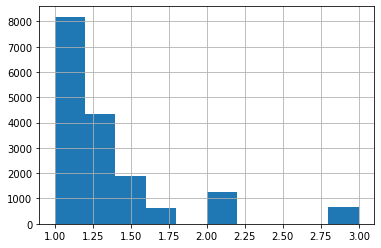

In [48]:
data['guard_police_ratio'].hist();

В распределении видны явные выбросы, поэтому используем непараметрический метод расчета корреляции.

In [49]:
data[['guard_police_ratio', 'percent_of_crime_solved']].corr(method='spearman')

,guard_police_ratio,percent_of_crime_solved
guard_police_ratio,1.000000,-0.005047
percent_of_crime_solved,-0.005047,1.000000


**Корреляция не обнаружена.**

In [50]:
data['light_police_ratio'] = data['number_of_lights']/data['police_units']
data['light_police_ratio'].head()

0    120.833333
1    109.333333
2    128.750000
3    116.285714
4    172.500000
Name: light_police_ratio, dtype: float64

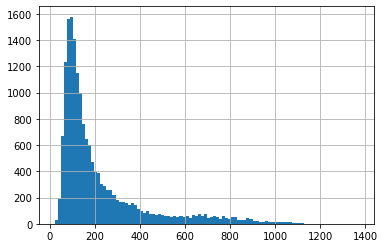

In [51]:
data['light_police_ratio'].hist(bins=100);

Распределение ненормальное, поэтому используем корреляцию Спирмена.

In [52]:
data[['light_police_ratio', 'percent_of_crime_solved']].corr(method='spearman')

,light_police_ratio,percent_of_crime_solved
light_police_ratio,1.000000,0.222582
percent_of_crime_solved,0.222582,1.000000


Мы видим небольшую положительную корреляцию. Однако она слишком невелика, чтобы ее учитывать.

<a id='ch9' ></a>
## Ответ на вопрос о пользе увеличения количества полицейских.

Чтобы понять принесет ли увеличение количества полицейских результат в виде увеличения раскрываемости преступлений сравним данные с минимальным и максимальным количеством полицейских в секторе.

In [53]:
max(data['police_units'])

9

In [54]:
min(data['police_units'])

1

In [55]:
min_police = data[data['police_units'] == 1]['percent_of_crime_solved']

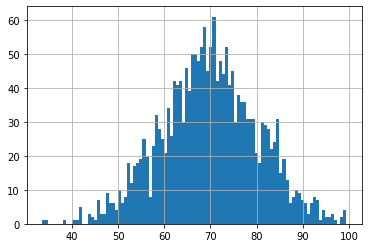

In [56]:
min_police.hist(bins=100);

In [57]:
max_police = data[data['police_units'] == 9]['percent_of_crime_solved']

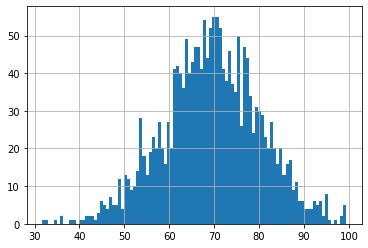

In [58]:
max_police.hist(bins=100);

In [59]:
min_police.mean()

69.90272057620274

In [60]:
max_police.mean()

69.48294534978471

In [61]:
min_police.count()

1904

In [62]:
max_police.count()

1858

Мы видим, что средний процент раскрываемости практически одинаковый для секторов с одним полицейским и с девятью. Выборки слишком малочислены, чтобы посчитать статистическую значимость изменения в 0.5%. **Однако и без этого очевидно, что если даже при девятикратном увеличении количества полицейских процент раскрываемых преступлений заметно не изменился, то последующее увеличение количества полиции на улицах не сможет улучшить ситуацию.**

<a id='ch10' ></a>
## Промежуточный итог

Мы попытались найти взаимосвязь между процентом раскрытых преступлений и различными факторами в том числе комплексными. В итоге значительная взаимосвязь установлена между количеством расркытых преступлений и количеством фонарей в секторе, уровень корреляции составил 0.55.
***
Также мы установили, что увеличение количество полиции на улицах вряд ли поможет снизить преступность.

<a id='ch11' ></a>
## Как снизить преступность

Мы поставили перед собой задачу снизить преступность. Но как нам этого добиться?
Одним из вариантов будет рассмотреть наиболее успешные по проценту раскрытых преступлений кейсы и сравнить их с данными неудачных кейсов, чтобы определить, какие параметры позволяют успешным кейсам быть успешными.

Ранее мы установили, что единственный параметр, коррелирующий с процентом раскрытых преступлений - это количество фонарей в секторе, поэтому будем сравнивать этот параметр.

Мы разделим наш датафрейм на две части по медиане количества фонарей в секторе, найдем средний процент раскрытых преступлений для каждой группы и проверим наличие статистической значимости в их разнице. Если она есть, то это означает, что увеличение количества фонарей позволит статистически значимо снизить уровень преступности.

In [63]:
data['number_of_lights'].median()

687.0

In [64]:
many_lights = data[data['number_of_lights'] >= 687]

In [65]:
few_lights = data[data['number_of_lights'] < 687]

In [66]:
few_lights['percent_of_crime_solved'].mean()

64.81204141378458

In [67]:
many_lights['percent_of_crime_solved'].mean()

74.63513722184852

Мы видим, что разница в среднем проценте раскрытых преступлений составляет 10%, что очень много, но все равно проверим наличие статистической значимости с помощью t-test.

In [68]:
many_lights.count()

date                       8542
district                   8542
warehouse_name             8542
number_of_guards           8542
police_units               8542
percent_of_crime_solved    8542
number_of_lights           8542
sector                     8542
guard_police_ratio         8542
light_police_ratio         8542
dtype: int64

In [69]:
few_lights.count()

date                       8458
district                   8458
warehouse_name             8458
number_of_guards           8458
police_units               8458
percent_of_crime_solved    8458
number_of_lights           8458
sector                     8458
guard_police_ratio         8458
light_police_ratio         8458
dtype: int64

Выборки достаточно велики, а значит мы можем считать, что выборочные средние распределяются нормально (спасибо ЦПТ). Можно провести t-test.

**Тест будет односторонний, так как по заданию нам нужно статистически значимо снизить количество краж, т.е. статистически значимо повысить раскрываемость преступлений, поэтому альтернативной гипотезой у нас будет утверждение, что средний процент раскрываемости группы many_lights выше чем у группы few_lights.**

В нашем случае нулевая гипотеза звучит следующим образом:

***Средний процент раскрытых преступлений равен для групп many_lights и few_lights.***

Альтернативная гипотеза будет звучать так:

***Средний процент раскрытых преступлений для группы many_lights выше чем для группы few_lights.***

p-value установим равным 0.05.

In [70]:
alpha = 0.05 

results = st.ttest_ind(many_lights['percent_of_crime_solved'], few_lights['percent_of_crime_solved'], alternative='greater')

print('p-value равно', results.pvalue)

if results.pvalue > alpha:
    print('P-value больше уровня значимости, нет оснований, чтобы отвергнуть нулевую гипотезу.')
else:
    print('P-value меньше уровня значимости, отвергаем нулевую гипотезу в пользу альтернативной.')

p-value равно 0.0
P-value меньше уровня значимости, отвергаем нулевую гипотезу в пользу альтернативной.


<a id='ch12' ></a>
## Вывод

В рамках проекта мы рассматривали данные о криминальной обстановке в Сыроград. 

Перед нами стояла задача **статистически значимо снизить количество краж в районе**, а также ответить на вопрос о том, поможет ли увеличение количества полицейских снизить преступность в городе

В нашем распоряжении были два датасета со следующими данными:

В первом датасете:
- дата
- район города
- название склада
- количество охраны на складе
- количество полицейских на район

Во втором датасете:
- дата
- район города
- название склада
- процент раскрытых преступлений по уничтожению фонарей в городе
- количество фонарей в районе

Однако в ходе изучения данных мы предположили, что на самом деле информация дана не для больших районов, а для небольших секторов, определяемых по принципу район-название склада, так в один день в одном районе, но у разных складов было разное количество полицейских и фонарей, а также разный процент раскрытых преступлений. Поэтому мы добавили новый столбец `sector`.

Также важно отметить, что перед нами стояла задача снизить количество краж, однако в датасетах никакой информации о кражах нет. Указано только, что между разбитыми фонарями и кражами есть взаимосвязь. Поэтому мы предположили, что связь между данными событиями прямая. В таком случае нашей задачей становится снижение количества уничтожения фонарей, а для этого в свою очередь необходимо увеличить раскрываемость этих преступлений, так как:
***
**"Главным фактором, сдерживающим преступников, является неотвратимость их наказания" (Конфуций, 450 г. до н.э.)**

(на самом деле он такого не говорил)
***

Поэтому целью дальнейшего исследования было статистически значимо повысить раскрываемость преступлений.

На этапе оценки и предобработки данных мы нашли выбросы в значениях процента раскрытых преступлений. Выбросы составили менее 2% от общего количества строк, поэтому мы их удалили.

Затем мы посмотрели корреляцию имеющихся значений и установили, что более-менее сильная корреляция есть только между количеством фонарей в секторе и процентом раскрытых преступлений.

Затем мы рассмотрели два невяных фактора, которые могли бы повлиять на процент раскрытых преступлений:
- соотношение количества охраны и полиции.
- количество фонарей на одного полицейского.
Мы установили, что охраны всегда столько же или больше, чем полицейских.

Последующий расчет для данных параметров не показал значительной корреляции с процентом раскрытых преступлений.

На следующем этапе мы проверили, насколько сильно влияет увеличение количества полицейских в секторе на процент раскрытых преступлений. Для этого мы сравнили процент раскрытых преступлений в ситуациях, когда в секторе было минимальное количество полицейских (1) с процентом раскрытых преступлений, когда было максимум полицейских (9). Мы получили одинаковый средний процент раскрытых преступлений, поэтому **можно сделать вывод, что увеличение количества полицейских не поможет повысить раскрываемость преступлений.**

На финальном этапе мы рассмотрели наиболее успешные по проценту раскрытых преступлений кейсы и сравнили их с данными неудачных кейсов, чтобы определить, какие параметры позволяют успешным кейсам быть успешными.

Ранее мы установили, что единственный параметр, коррелирующий с процентом раскрытых преступлений - это количество фонарей в секторе, поэтому дальше мы сравнивали среднее значение данного параметра

Мы разделили наш датафрейм на две части по медиане количества фонарей в секторе (687), нашли средний процент раскрытых преступлений для каждой группы:
- 64.81% у кейсов, где фонарей мало;
- 74.64% у кейсов, где фонарей много.

Далее с помощью одностороннего t-test'а мы проверили наличие статистически значимой разницы.

В нашем случае нулевая гипотеза звучала следующим образом:

***Средний процент раскрытых преступлений равен для групп many_lights и few_lights.***

А льтернативная:

***Средний процент раскрытых преступлений для группы many_lights выше чем для группы few_lights.***

p-value равен **0.05**.

В итоге p-value получился равным нулю, т.е. у нас есть основания отвергнуть нулевую гипотезу.

**Итоговая рекомендация заключается в том, что для того, чтобы снизить преступность нужно поставить больше фонарей.**

(☞ ͡° ͜ʖ ͡°)☞